Algorithme K means est un des Algorithmes partitionnel les plus utilisés

In [124]:
#import libraries 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

# lectures des données 

In [125]:
data1 = pd.read_csv("Mall_Customers.csv")
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [126]:
X = data1[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

# visualisation des données 

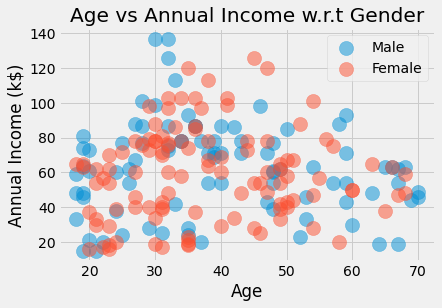

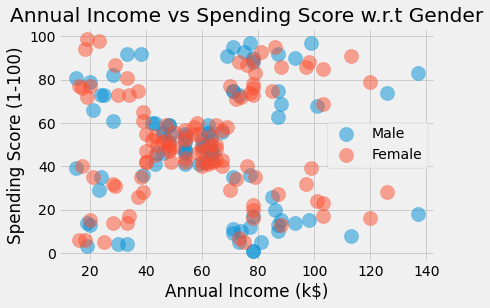

In [127]:
plt.style.use('fivethirtyeight')
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = data1[data1['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()


for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = data1[data1['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

# pretraitement et codage des données categoriques

In [128]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
data1['Gender'] = labelencoder.fit_transform(data1['Gender'])
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# Algorithme Kmeans

In [129]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
def create_clusters(centroid, k, X):
    clusters = [[] for _ in range(k)] #contient les indices des points plus proches au centre 
    for idx, sample in enumerate(X):
        centroid_idx = closest_centroid(sample, centroids)
        clusters[centroid_idx].append(idx)
    return clusters

def closest_centroid(sample, centroids):
    distances = [euclidean_distance(sample, point) for point in centroids]
    closest_index = np.argmin(distances)
    return closest_index

def get_centroids(clusters, k, m, X):
    #calcul de la moyenne ou centre de gravité (4, 2)
    centroids = np.zeros((k, m))
    for cluster_idx, cluster in enumerate(clusters):
        cluster_mean = np.mean(X[cluster], axis=0)
        centroids[cluster_idx] = cluster_mean
        
    return centroids

def is_converged(centroids_old, centroids, k):
    distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(k)]
    return sum(distances) == 0


def get_cluster_labels(clusters):
    labels = np.empty(n)
    for cluster_idx, cluster in enumerate(clusters):
        for sample_index in cluster:
            labels[sample_index] = cluster_idx
            
    return labels
 

def afficher (clusters, centroids,  X):
    plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = data1 , c = clusters , 
            s = 200 )
    plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
    plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
    plt.show()

In [130]:
k = 3
max_iters=300
# centroids = []
# clusters = [[] for _ in range(k)]
# n, m = X.shape
# n, m

In [131]:
#initialisation aleatoire des centres 
# indices = np.random.choice(n, k, replace=False)
# centroids = [X[idx] for idx in indices]

In [132]:
centroids = []
clusters = [[] for _ in range(k)]
n, m = X.shape
indices = np.random.choice(n, k, replace=False)
centroids = [X[idx] for idx in indices]
for i in range(max_iters):
    #creer les clusters 
    clusters = create_clusters(centroids, k, X)

    #apres avoir creer les clusters faut calculer les nvx centres et sauvegarder les centres precedents pour le test 
    centroids_old = centroids
    centroids = get_centroids(clusters, k, m, X)

    # verifier les convergences 
    if is_converged(centroids_old, centroids, k):
        break

resultats = get_cluster_labels(clusters)

In [133]:
resultats

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2.,
       0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0.,
       2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2.,
       0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0.,
       2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2.])

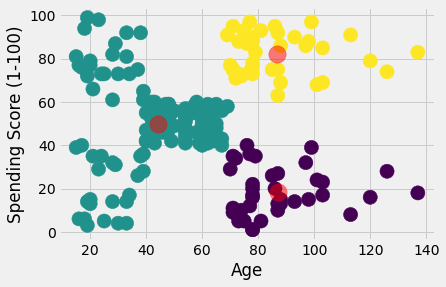

In [134]:
afficher (resultats, centroids, X)

# algorithme definit sur SKlearn  

In [145]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=300, random_state=111).fit(X)
labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_

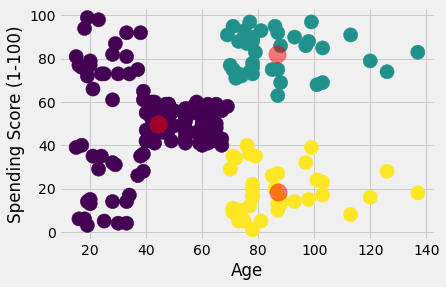

In [146]:
afficher (labels1, centroids1, X)

# choisir le meilleur nombre de clusters 

il existe deux méthodes 
   1. elbow methode 
   2. silhouette methode 
   
**dans notre cas on va itérer sur N valeurs de K et essayer de trouver la valeur de k la plus optimale**

In [147]:
def calculate_cost(X, resultats, centroids):
    somme = 0
    for i, val in enumerate(X):
        somme += ((val[0] - centroids[int(resultats[i]), 0])**2 + (val[1] - centroids[int(resultats[i]), 1])**2) 
    return somme
# def get_label():
#     for i, val in enumerate(X):
#         for cluster_idx, cluster in enumerate(clusters):
#             for sample_index in cluster:
#                 labels[sample_index] = cluster_idx
        

In [148]:
n =11
cost_list = []
for k in range(1,n):
    centroids = []
    clusters = [[] for _ in range(k)]
    n, m = X.shape
    indices = np.random.choice(n, k, replace=False)
    centroids = [X[idx] for idx in indices]
    for i in range(max_iters):
        #creer les clusters 
        clusters = create_clusters(centroids, k, X)

        #apres avoir creer les clusters faut calculer les nvx centres et sauvegarder les centres precedents pour le test 
        centroids_old = centroids
        centroids = get_centroids(clusters, k, m, X)

        # verifier les convergences 
        if is_converged(centroids_old, centroids, k):
            break

    resultats = get_cluster_labels(clusters)
    
    cost = calculate_cost(X, resultats, centroids)
    cost_list.append(cost)


In [149]:
!pip install seaborn

^C


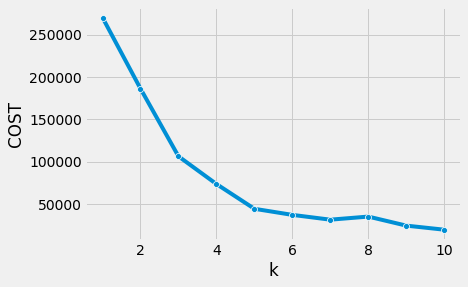

In [150]:
import seaborn as sns
sns.lineplot(x=range(1,11), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('COST')
plt.show()

on remarque que la valeur la plus petite de l'inertie ou distance quadratique est égale a 5, alors on prendra 5 clusters

tester avec les valeurs de l'algorithme de SKlearn 

In [141]:
inertia= []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

C:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:965: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn(


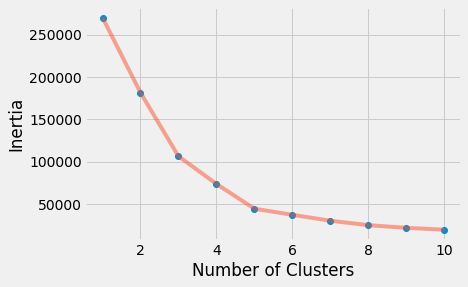

In [142]:
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

ca nous donne aussi 5 clusters 

# tester pour k = 5

In [143]:
k = 5
max_iters=300
centroids = []
clusters = [[] for _ in range(k)]
n, m = X.shape
indices = np.random.choice(n, k, replace=False)
centroids = [X[idx] for idx in indices]
for i in range(max_iters):
    #creer les clusters 
    clusters = create_clusters(centroids, k, X)

    #apres avoir creer les clusters faut calculer les nvx centres et sauvegarder les centres precedents pour le test 
    centroids_old = centroids
    centroids = get_centroids(clusters, k, m, X)

    # verifier les convergences 
    if is_converged(centroids_old, centroids, k):
        break

resultats = get_cluster_labels(clusters)

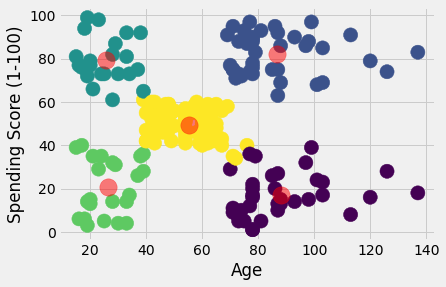

In [144]:
afficher (resultats, centroids, X)